<h1 align="center">Lab 5 - Kohonen Net and Manifolds  </font> </h1>

<h2 align="center">1. Kohonen Net with Random Translated Gaussian Blob Inputs </h2> 

Use Kohonen's algorithm to learn the mapping from a two-dimensional input array to a two-dimensional output array of neurons, beginning with a random receiptive field for each of the neurons. 

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from utils.lab5_utils import KohonenNetPlotter
import pdb

In [3]:
#Initialization of the parameters:

# input array
imsz=10;
im=np.zeros((imsz,imsz));
imx,imy=np.mgrid[:imsz,:imsz]; # image coordinates

# output array
SZ=10;
X,Y=np.mgrid[:SZ,:SZ];

# Number of Steps
numTrials = 12000

In [4]:
def imgen():
    # image generation function for problem 1, please do not modify
    x=imsz*np.random.rand()
    y=imsz*np.random.rand()
    im=np.exp(-0.5*((x-imx)**2+(y-imy)**2));
    return im

The input signals to the Kohonen network are images of Gaussian blobs at random locations of the image. The following is a visualization of one such image.

<IPython.core.display.Javascript object>


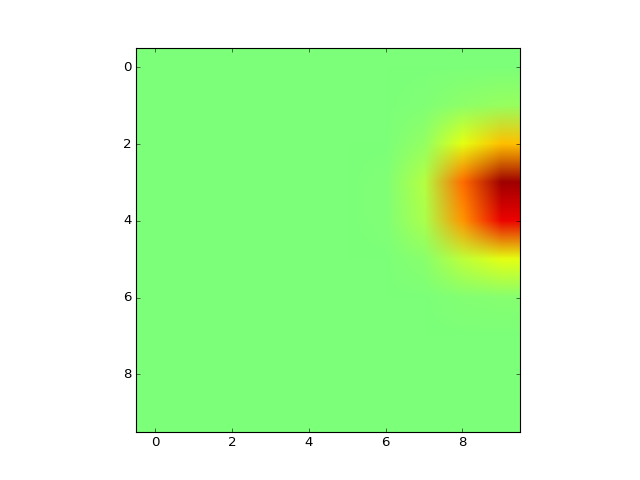

In [5]:
plt.figure()
axes = plt.imshow(imgen(), vmin=-1,vmax=1)

<h2 align="center">1.1 Kohonen Net Implementation </h2> 

For the both of the functions eta_fun and sigma_fun, the default numbers are very small. If you do not modify the function, your Kohonen Net would not converge to the right state. Since Kohonen Net is highly non-convex, we should use a simulated annealing method. And the basic idea is that learning rate and the propogation range should be some decreasing function. So at the beginning, using a large number can get out of the local minimum more easily, and later, a small and slow process will make a the network converge well. So try to implement such a process and play with different strategies.

In [6]:
def eta_fun(t):
    # learning rate
    # eta = 0.005 # default learning rate
    eta = 4.0
    # You should design a learning rate rule such that the Kohonen Net converges properly.
    
    return eta * np.power(t+1, -0.5)

def sigma_fun(t):
    # width of Gaussian for spreading excitation
    sigma = 15.0 # default width
    # You design a activation propogation range rule such that the Kohonen Net converges properly.
    # YOUR CODE HERE
#     raise NotImplementedError()
    
    return sigma * np.power(t+1, -0.2)

def KohonenNetLearning(imgenerator):

    # weights initialization
    W=np.random.rand(imsz**2,SZ**2);
    W=np.dot(W,np.diag(1./np.sqrt(np.sum(W**2,0))));
    
    #Initialize Plotter
    plotter = KohonenNetPlotter(imx,imy,W,0)
    for t in range(numTrials):
        # paint Gaussian blob at a random position in image
        im = imgenerator()

        # compute output and find winner
        x = W.T @ im.flatten()
        winner_ind = np.argmax(x)
        win_x = winner_ind // imsz
        win_y = winner_ind % imsz
        ## YOUR CODE Here

        # spread activation to neighbors of winner
        ## YOUR CODE Here
        r = np.exp(-0.5*((win_x-imx)**2+(win_y-imy)**2)/sigma_fun(t));
        # Hebbian weight update
        delW = eta_fun(t) * r.flatten()[None, :] * (im.flatten()[:, None] - W)
        
        W += delW
        ## YOUR CODE Here

        # normalize weight vectors
        W=np.dot(W,np.diag(1./np.sqrt(np.sum(W**2,0)))); 

        # display network state every 100 trials
        if t%100==0:
            plotter.updatePlot(W,t)

<IPython.core.display.Javascript object>


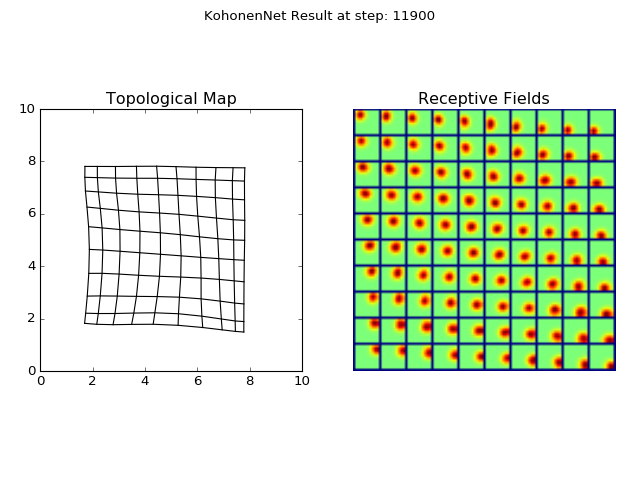

In [8]:
KohonenNetLearning(imgen)

<h2 align="center">1.2 Kohonen Net with Lesion </h2> 

Now create a lesion in the input array, so that a specific region is devoid (set to zero) of stimulation. How do the topological map and the receptive fields change? Please explain the result.

In [12]:
# lesion coordinates

l_x = 2 #np.random.choice(range(imsz-1))
l_y = 2 #np.random.choice(range(imsz-1))
l_xx = 6 #np.random.choice(range(l_x+1, imsz))  # ending coordinate for leison
l_yy = 6 #np.random.choice(range(l_y+1, imsz))

def imgen_lesion():
    # image generation function for problem 2
    # The input signal generation function to simulate a lesion
    x=imsz*np.random.rand()
    y=imsz*np.random.rand()
    im=np.exp(-0.5*((x-imx)**2+(y-imy)**2))
    
    # You should modify im to create a lesion:
    im[l_x:l_xx, l_y:l_yy] = 0
    
    return im

<IPython.core.display.Javascript object>


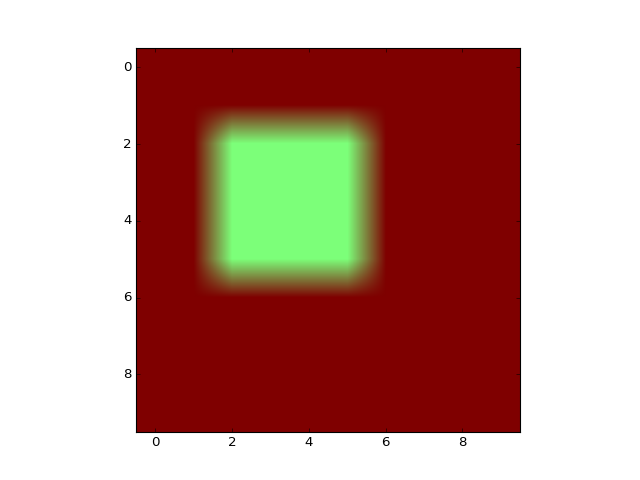

In [13]:
plt.figure()
bleh = np.ones((imsz, imsz))
bleh[l_x:l_xx, l_y:l_yy] = 0
axes = plt.imshow(bleh, vmin=-1,vmax=1)

<IPython.core.display.Javascript object>


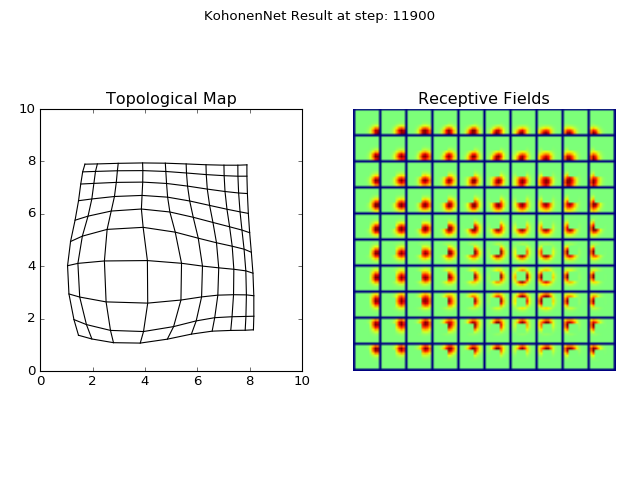

In [14]:
KohonenNetLearning(imgen_lesion)

**explanation**

There is a big lesion at region 2 < x < 6 and 2 < y < 6. Basically, we get no input in that region. Thus, that region is not covered by any receptive fields and the map "stretches" out over it because output neurons don't need to respond to stimuli in that region if it never gets any there. In the receptive fields, we see that even neurons that respond in that area do not inclue that patch in their receptive fields.

<h2 align="center">1.3 Kohonen Net with Non-uniform Inputs </h2> 

Increase the density of stimuli within one area of the array. How does the topological map  and the receptive fields change? Please explain the result.

In [29]:
def imgen_local_density_increased():
    # image generation function for problem 3
    x=np.clip(np.random.normal(2.0, 4.0), 0, 10)
    y=np.clip(np.random.normal(2.0, 4.0), 0, 10)
    im=np.exp(-0.5*((x-imx)**2+(y-imy)**2))
    
#     if not ( 1 < x < 4 and 1 < y < 4) and np.random.rand() < 0.9:
#         x=imsz*np.random.rand()
#         y=imsz*np.random.rand()
#         im=np.exp(-0.5*((x-imx)**2+(y-imy)**2))

    return im

<IPython.core.display.Javascript object>


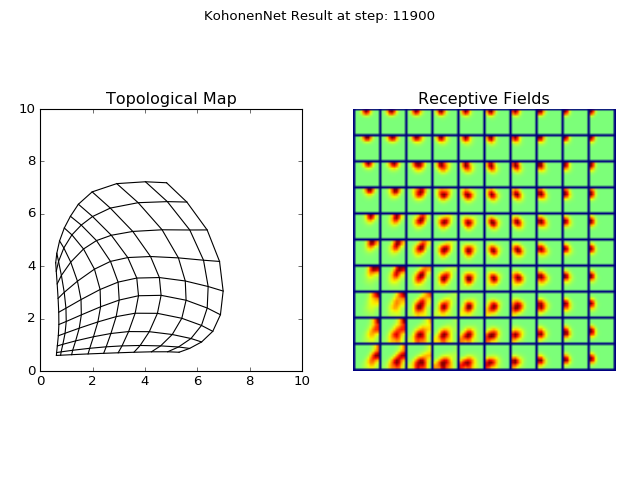

In [30]:
KohonenNetLearning(imgen_local_density_increased)

**explanation**

Instead of pulling input stimuli from a uniform distribution over the 10x10 grid, I pull them from a 2d gaussian centered at x=2, y=2 (with std dev 4 in both directions). Since far more of the inputs occur in this corner than elsewhere in the space, the receptive fields of the output units are far more dense in that corner. The output units that are pretty far from that corner have large receptive fields covering a lot of area, since there is not as much information out in regions far away from (2, 2).